Examen Final **Zerbi, María Florencia** - ISTEA 2025 - *Minería de Datos I*

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [35]:
# Importación del dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)

print(df.head())
df.shape


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

(32561, 15)



--------------------------------------------------------------------------------







**1) Valores faltantes**

In [36]:
# a. ¿Cuántas filas tienen al menos un valor faltante? ¿Qué porcentaje representan sobre el total?

datos_nulos = df[df.isin(['?']).any(axis=1)]
print(f"Número de filas con al menos un valor faltante: {datos_nulos.shape[0]}")
porcentaje_nulos = (datos_nulos.shape[0] / df.shape[0]) * 100
print(f"Porcentaje de filas con al menos un valor faltante: {porcentaje_nulos:.2f}%")

Número de filas con al menos un valor faltante: 2399
Porcentaje de filas con al menos un valor faltante: 7.37%


In [37]:
# b. Eliminá esas filas. ¿Cuántas quedaron?

df_limpio = df.drop(datos_nulos.index)
print(f"Número de filas después de eliminar las que tienen valores faltantes: {df_limpio.shape[0]}")

Número de filas después de eliminar las que tienen valores faltantes: 30162


In [38]:
# c. Desde lo teórico: ¿qué ventajas y desventajas tiene eliminar filas con valores faltantes? ¿Cuándo convendría imputar?

*   Las ventajas de eliminar filas con valores faltantes incluyen la simplificación del análisis y la reducción de sesgos potenciales.
*   Las desventajas son la pérdida de información y la posible distorsión de los resultados si las filas eliminadas contienen patrones importantes.
*   Imputar es preferible cuando se desea conservar la mayor cantidad de datos posible, especialmente si los valores faltantes son pocos o aleatorios.
*   Eliminar filas es más adecuado cuando los valores faltantes son numerosos o sistemáticos, lo que podría afectar la validez del análisis.



--------------------------------------------------------------------------------







**2) Outliers (valores atípicos)**

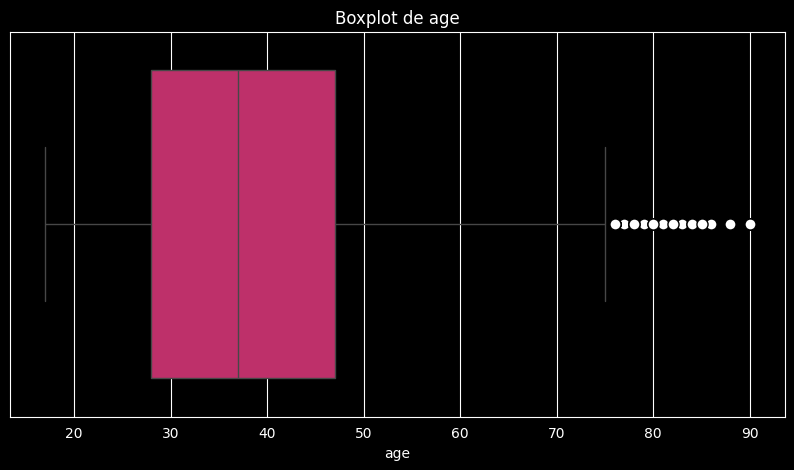

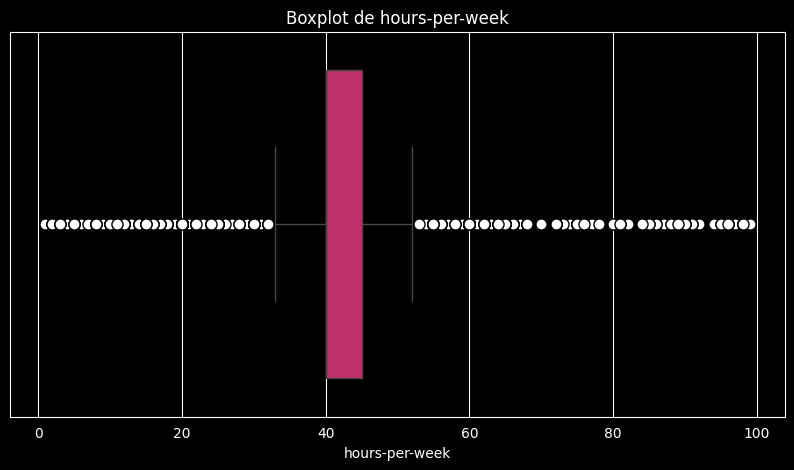

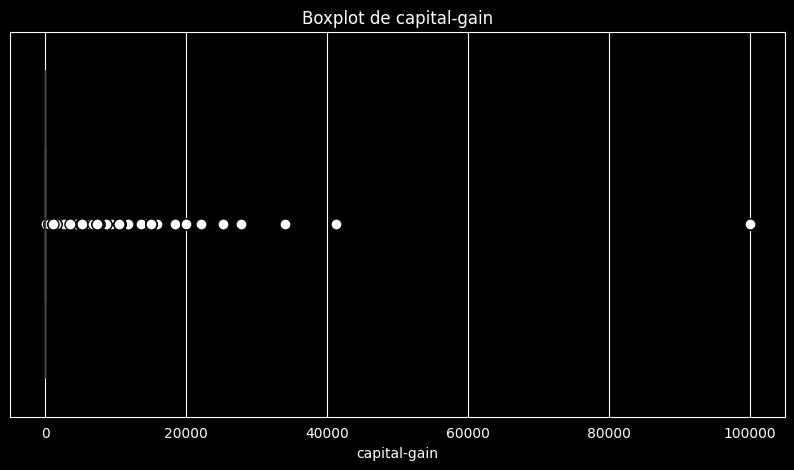

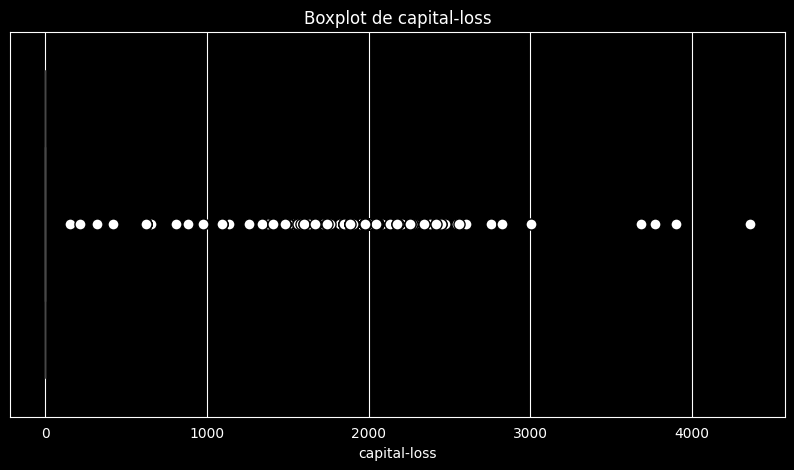

In [39]:
# a. Usá boxplots para detectar valores atípicos en las siguientes variables: age, hours-per-week, capital-gain, capital-loss.

# Variable age
sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['age'], color=sns.color_palette('PuRd')[4], flierprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=8))
plt.title(f'Boxplot de age')
plt.xlabel('age')
plt.show()

# Variable hours-per-week
sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['hours-per-week'], color=sns.color_palette('PuRd')[4], flierprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=8))
plt.title(f'Boxplot de hours-per-week')
plt.xlabel('hours-per-week')
plt.show()

# Variable capital-gain
sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['capital-gain'], color=sns.color_palette('PuRd')[4], flierprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=8))
plt.title(f'Boxplot de capital-gain')
plt.xlabel('capital-gain')
plt.show()

# Variable capital-loss
sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['capital-loss'], color=sns.color_palette('PuRd')[4], flierprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=8))
plt.title(f'Boxplot de capital-loss')
plt.xlabel('capital-loss')
plt.show()


In [40]:
# b. Aplicá la técnica intercuartílica para contar cuántos valores atípicos hay en cada una.

# Variable age
Q1_age = df_limpio['age'].quantile(0.25)
Q3_age = df_limpio['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
outliers_age = df_limpio[(df_limpio['age'] < lower_bound_age) | (df_limpio['age'] > upper_bound_age)]
print(f"Número de valores atípicos en age: {outliers_age.shape[0]}")
print(f"Q1: {Q1_age}\nQ3: {Q3_age}\nIQR: {IQR_age}\nlower_bound: {lower_bound_age}\nupper_bound: {upper_bound_age}\n")

# Variable hours-per-week
Q1_hours = df_limpio['hours-per-week'].quantile(0.25)
Q3_hours = df_limpio['hours-per-week'].quantile(0.75)
IQR_hours = Q3_hours - Q1_hours
lower_bound_hours = Q1_hours - 1.5 * IQR_hours
upper_bound_hours = Q3_hours + 1.5 * IQR_hours
outliers_hours = df_limpio[(df_limpio['hours-per-week'] < lower_bound_hours) | (df_limpio['hours-per-week'] > upper_bound_hours)]
print(f"Número de valores atípicos en hours-per-week: {outliers_hours.shape[0]}")
print(f"Q1: {Q1_hours}\nQ3: {Q3_hours}\nIQR: {IQR_hours}\nlower_bound: {lower_bound_hours}\nupper_bound: {upper_bound_hours}\n")

# Variable capital-gain
Q1_gain = df_limpio['capital-gain'].quantile(0.25)
Q3_gain = df_limpio['capital-gain'].quantile(0.75)
IQR_gain = Q3_gain - Q1_gain
lower_bound_gain = Q1_gain - 1.5 * IQR_gain
upper_bound_gain = Q3_gain + 1.5 * IQR_gain
outliers_gain = df_limpio[(df_limpio['capital-gain'] < lower_bound_gain) | (df_limpio['capital-gain'] > upper_bound_gain)]
print(f"Número de valores atípicos en capital-gain: {outliers_gain.shape[0]}")
print(f"Q1: {Q1_gain}\nQ3: {Q3_gain}\nIQR: {IQR_gain}\nlower_bound: {lower_bound_gain}\nupper_bound: {upper_bound_gain}\n")

# Variable capital-loss
Q1_loss = df_limpio['capital-loss'].quantile(0.25)
Q3_loss = df_limpio['capital-loss'].quantile(0.75)
IQR_loss = Q3_loss - Q1_loss
lower_bound_loss = Q1_loss - 1.5 * IQR_loss
upper_bound_loss = Q3_loss + 1.5 * IQR_loss
outliers_loss = df_limpio[(df_limpio['capital-loss'] < lower_bound_loss) | (df_limpio['capital-loss'] > upper_bound_loss)]
print(f"Número de valores atípicos en capital-loss: {outliers_loss.shape[0]}")
print(f"Q1: {Q1_loss}\nQ3: {Q3_loss}\nIQR: {IQR_loss}\nlower_bound: {lower_bound_loss}\nupper_bound: {upper_bound_loss}")

Número de valores atípicos en age: 169
Q1: 28.0
Q3: 47.0
IQR: 19.0
lower_bound: -0.5
upper_bound: 75.5

Número de valores atípicos en hours-per-week: 7953
Q1: 40.0
Q3: 45.0
IQR: 5.0
lower_bound: 32.5
upper_bound: 52.5

Número de valores atípicos en capital-gain: 2538
Q1: 0.0
Q3: 0.0
IQR: 0.0
lower_bound: 0.0
upper_bound: 0.0

Número de valores atípicos en capital-loss: 1427
Q1: 0.0
Q3: 0.0
IQR: 0.0
lower_bound: 0.0
upper_bound: 0.0


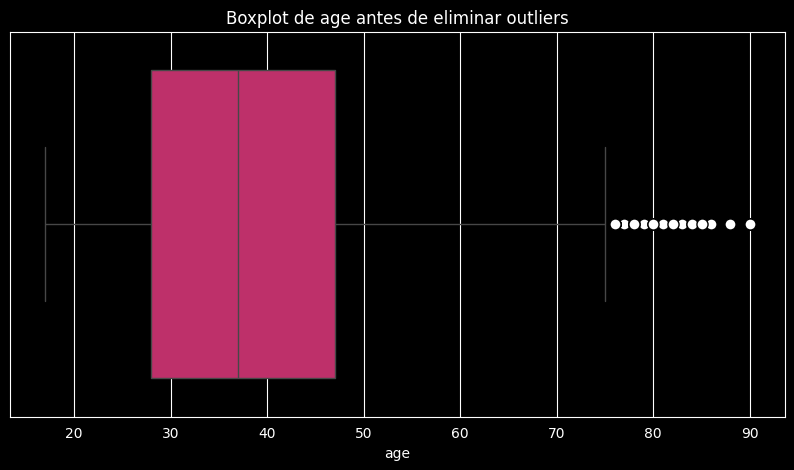

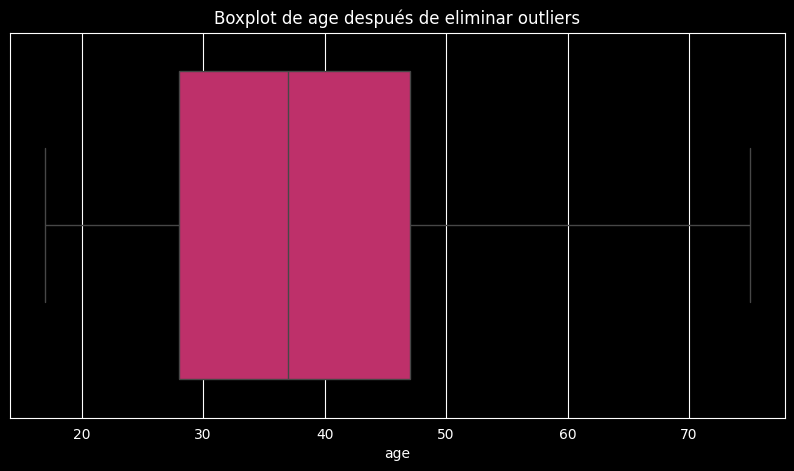

In [41]:
# c. Elegí una de estas variables y eliminá los outliers. Mostrá los gráficos antes y después. ¿Qué cambia?

# Variable elegida: 'age'

# Gráfico antes de eliminar outliers
sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['age'], color=sns.color_palette('PuRd')[4], flierprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=8))
plt.title(f'Boxplot de age antes de eliminar outliers')
plt.xlabel('age')
plt.show()

# Eliminación de outliers
df_limpio = df_limpio[~((df_limpio['age'] < lower_bound_age) | (df_limpio['age'] > upper_bound_age))]

# Gráfico después de eliminar outliers
sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpio['age'], color=sns.color_palette('PuRd')[4], flierprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=8))
plt.title(f'Boxplot de age después de eliminar outliers')
plt.xlabel('age')
plt.show()

Al eliminar los outliers, el rango intercuartílico se reduce, lo que puede hacer que la distribución de la variable sea más representativa de la mayoría de los datos.



--------------------------------------------------------------------------------







**3) Codificación del target y de variables categóricas**

In [42]:
# a. Codificá la variable income usando LabelEncoder y llamala income_encoded.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
income_encoded = label_encoder.fit_transform(df_limpio['income'])
df_codificado = pd.DataFrame(income_encoded, columns=['income_encoded'])
df_codificado

,income_encoded
0,0
1,0
2,0
3,0
4,0
...,...
29988,0
29989,1
29990,0
29991,0


In [43]:
# b. Aplicá OneHotEncoder a tres variables categóricas que consideres importantes. Justificá tu elección.

from sklearn.preprocessing import OneHotEncoder

variables_categoricas = ['workclass', 'race', 'sex']
onehotencoder = OneHotEncoder()
variables_codificadas = onehotencoder.fit_transform(df_limpio[variables_categoricas])
df_variables_codificadas = pd.DataFrame(variables_codificadas.toarray(), columns=onehotencoder.get_feature_names_out(variables_categoricas))

df_variables_codificadas

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29989,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29991,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Elegí estas variables porque pueden influir significativamente en el ingreso de una persona, ya sea por una posible desigualdad o discriminación laboral por raza, sexo o clase social.

In [44]:
# c. ¿Qué problema puede generar OneHotEncoder si una variable tiene muchas categorías?

OneHotEncoder puede generar un gran número de columnas si una variable tiene muchas categorías, lo que puede llevar a un aumento significativo en la dimensionalidad del dataset.
Esto puede causar problemas de sobreajuste en modelos de machine learning y aumentar el tiempo de entrenamiento y predicción.
Además, puede dificultar la interpretación de los resultados debido a la gran cantidad de variables generadas.



--------------------------------------------------------------------------------







**4) División en entrenamiento y prueba**

In [45]:
# a. Separá el dataset en entrenamiento y prueba con la proporción que consideres adecuada.

from sklearn.model_selection import train_test_split

X = df_variables_codificadas
y = df_codificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (23994, 14)
Tamaño del conjunto de prueba: (5999, 14)


In [46]:
# b. ¿Qué puede pasar si usamos muy pocos datos para entrenar o muy pocos para testear?

1.   Si usamos muy pocos datos para entrenar, el modelo puede no aprender adecuadamente las relaciones en los datos, lo que lleva a un sobreajuste y a un rendimiento deficiente en datos nuevos.
2.   Si usamos muy pocos datos para testear, la evaluación del modelo puede no ser representativa, lo que puede llevar a conclusiones erróneas sobre su rendimiento.



--------------------------------------------------------------------------------







**5) Modelo: Árbol de Decisión**

In [47]:
# a. Entrená un DecisionTreeClassifier con random_state=42.

from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

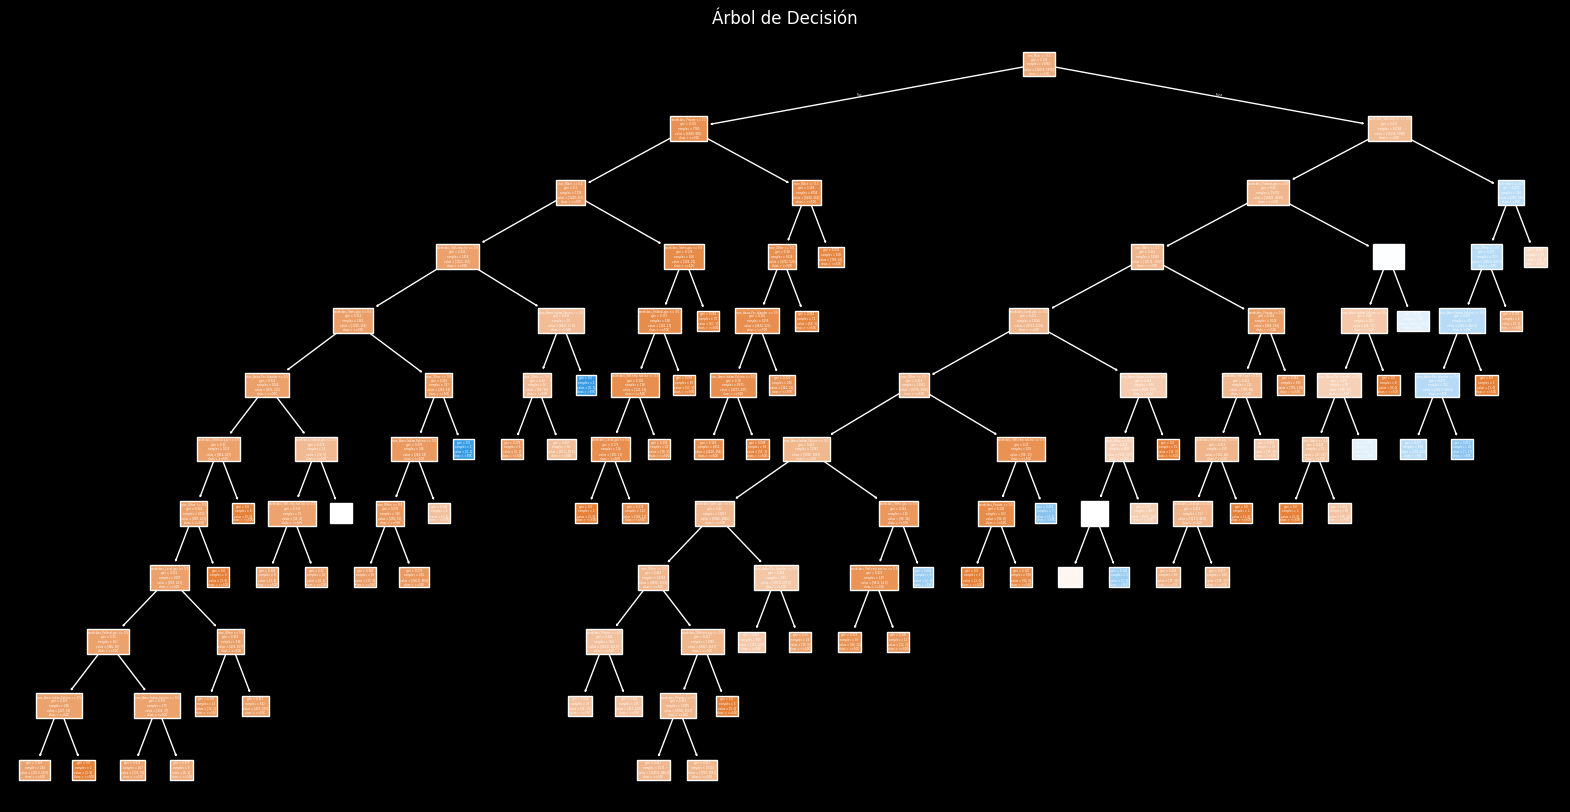

In [48]:
# Arbol de decisión graficado

from sklearn.tree import plot_tree

sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
plot_tree(arbol, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.title("Árbol de Decisión")
plt.show()

In [49]:
# b. Mostrá: profundidad del árbol, cantidad de hojas y variables más importantes.

print(f"Profundidad del árbol: {arbol.get_depth()}")
print(f"Cantidad de hojas: {arbol.get_n_leaves()}")
importantes = arbol.feature_importances_
feature_names = X_train.columns
df_importantes = pd.DataFrame({'feature': feature_names, 'importance': importantes})
df_importantes = df_importantes.sort_values(by='importance', ascending=False)
print(df_importantes)

Profundidad del árbol: 11
Cantidad de hojas: 60
                       feature  importance
13                    sex_Male    0.581612
3       workclass_Self-emp-inc    0.181924
0        workclass_Federal-gov    0.059831
9                   race_Black    0.053545
2            workclass_Private    0.040681
7      race_Amer-Indian-Eskimo    0.018865
10                  race_Other    0.014035
1          workclass_Local-gov    0.013499
5          workclass_State-gov    0.011009
11                  race_White    0.010153
4   workclass_Self-emp-not-inc    0.007343
8      race_Asian-Pac-Islander    0.005521
6        workclass_Without-pay    0.001981
12                  sex_Female    0.000000


In [50]:
# c. ¿Qué ventajas tiene este modelo? ¿En qué casos no lo recomendarías?

Las ventajas del Árbol de Decisión incluyen su interpretabilidad, ya que se puede visualizar fácilmente, y su capacidad para manejar tanto variables numéricas como categóricas sin necesidad de escalado.
No lo recomendaría en casos donde se requiera alta precisión, ya que los árboles de decisión pueden ser propensos al sobreajuste, especialmente con datasets pequeños o ruidosos.
Además, pueden ser inestables ante pequeñas variaciones en los datos, lo que puede afectar la generalización del modelo.



--------------------------------------------------------------------------------







**6) Evaluación del modelo**

In [51]:
# a. Calculá las métricas: accuracy, precision, recall, f1-score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = arbol.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.75
Precision: 0.51
Recall: 0.10
F1-score: 0.17


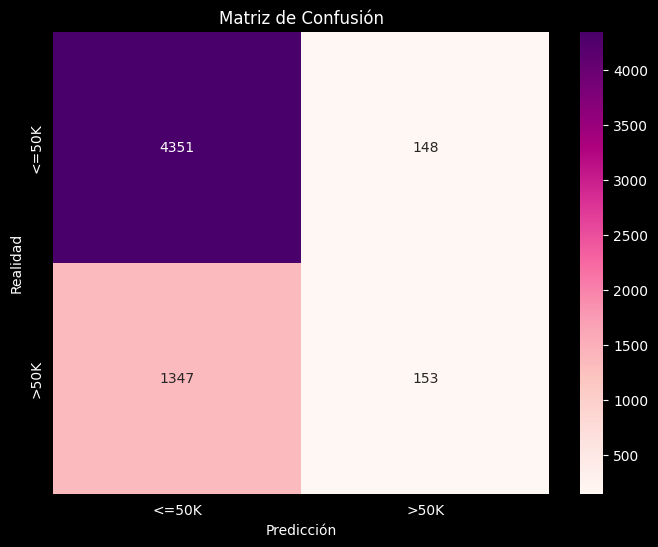

In [52]:
# b. Mostrá la matriz de confusión.

from sklearn.metrics import confusion_matrix

sns.set_style("whitegrid")
plt.style.use('dark_background')
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='RdPu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [53]:
# c. Si estuvieras clasificando personas para recibir ayuda estatal, ¿qué métrica te parecería más importante? Justificá.

*   En este caso, la métrica más importante sería el recall, ya que queremos asegurarnos de identificar correctamente a todas las personas que realmente necesitan ayuda estatal.
*   Un alto recall significa que estamos minimizando los falsos negativos, es decir, no estamos dejando de ayudar a personas que realmente lo necesitan.



--------------------------------------------------------------------------------







**7) Exploración sin supervisión: DBSCAN**

In [54]:
# a. Elegí dos o tres variables numéricas para analizar patrones (por ejemplo: capital-gain, hours-per-week, age).

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

variables_numericas = df_limpio[['capital-gain', 'hours-per-week', 'age']]
scaler = StandardScaler()
variables_numericas_scaled = scaler.fit_transform(variables_numericas)
print(variables_numericas_scaled)


[[ 0.14682227 -0.08381433  0.06305317]
 [-0.14702734 -2.34861354  0.92505499]
 [-0.14702734 -0.08381433 -0.01531064]
 ...
 [-0.14702734 -0.08381433  1.5519654 ]
 [-0.14702734 -1.76144337 -1.26913147]
 [ 1.88369786 -0.08381433  1.08178259]]


In [55]:
# b. Aplicá el algoritmo DBSCAN para detectar agrupamientos automáticos. Indicá los parámetros usados (eps, min_samples).

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(variables_numericas_scaled)
print(f"Número de clusters detectados: {len(set(clusters)) - (1 if -1 in clusters else 0)}")


Número de clusters detectados: 4


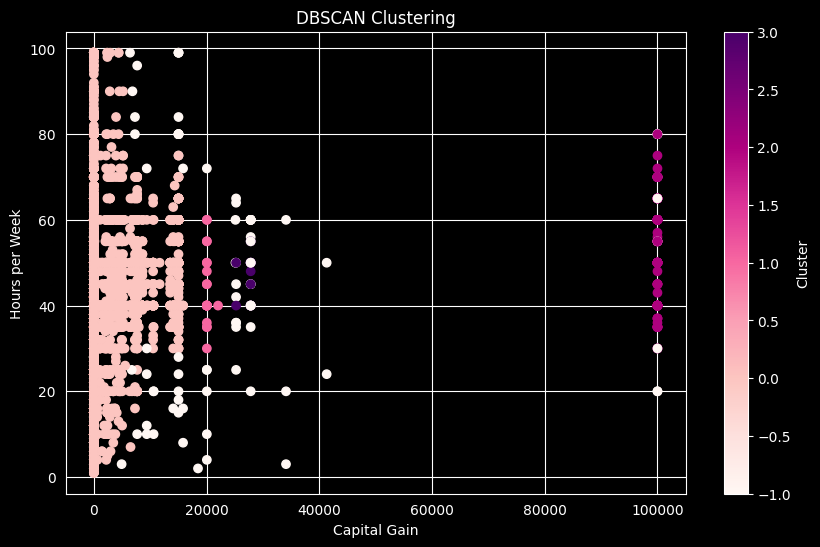

In [56]:
# c. Graficá los datos en un scatter plot, coloreando los puntos por los clusters encontrados.

sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.scatter(variables_numericas['capital-gain'], variables_numericas['hours-per-week'], c=clusters, cmap='RdPu', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Capital Gain')
plt.ylabel('Hours per Week')
plt.colorbar(label='Cluster')
plt.show()

In [57]:
# d. ¿Qué observás? ¿DBSCAN logró identificar grupos diferenciados? ¿Coinciden con la variable income_encoded?

*   DBSCAN logró identificar algunos grupos diferenciados, pero también hay puntos que no pertenecen a ningún cluster (etiquetados como -1).
Estos puntos podrían ser considerados como ruido.
*   Los clusters identificados no coinciden completamente con la variable income_encoded, ya que DBSCAN agrupa los datos basándose en la densidad de puntos, mientras que income_encoded es una clasificación binaria.

In [58]:
# e. ¿Qué ventajas y limitaciones tiene DBSCAN para este tipo de análisis?

*   Las ventajas de DBSCAN incluyen su capacidad para identificar clusters de forma no paramétrica y su resistencia al ruido, ya que puede etiquetar puntos como ruido si no pertenecen a ningún cluster.
*   Sus limitaciones incluyen la necesidad de elegir parámetros como eps y min_samples, lo que puede ser complicado y depender del contexto de los datos. Además, DBSCAN puede tener dificultades para identificar clusters de diferentes densidades y formas, lo que puede limitar su aplicabilidad en ciertos casos.



--------------------------------------------------------------------------------







8) Variable fnlwgt

In [59]:
# a. ¿Qué representa esta variable según la descripción del dataset?

La variable fnlwgt (final weight) representa el peso final de cada individuo en la muestra, que se utiliza para ajustar la muestra a la población total.

In [60]:
# b. ¿La dejarías para entrenar un modelo? Justificá tu decisión con tu propio criterio.

No dejaría la variable fnlwgt para entrenar un modelo, ya que su propósito es ajustar la muestra a la población total y no aporta información relevante sobre las características de los individuos.
Además, su inclusión podría introducir ruido en el modelo y afectar negativamente su rendimiento, ya que no está relacionada directamente con las características que influyen en el ingreso de una persona.
Por lo tanto, es mejor excluirla del conjunto de datos utilizado para el entrenamiento del modelo.

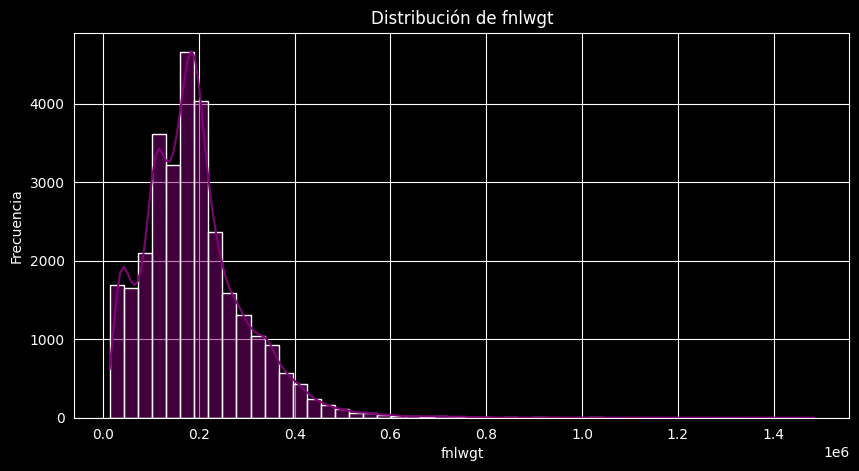

In [61]:
# c. Mostrá su distribución y comentá brevemente qué observás.

sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.histplot(df_limpio['fnlwgt'], bins=50, kde=True, color=sns.color_palette('RdPu')[5])
plt.title('Distribución de fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frecuencia')
plt.show()

La distribución de fnlwgt muestra una concentración de valores en torno a un rango específico, con una cola larga hacia la derecha.
Esto indica que la mayoría de los individuos tienen un peso final similar, pero hay algunos con pesos significativamente mayores, lo que podría influir en el análisis si se incluye en un modelo de machine learning.



--------------------------------------------------------------------------------







**9) Privacidad y anonimato**

In [62]:
# a. ¿Puede este dataset violar la privacidad aunque no tenga nombres? Explicá por qué.

Sí, este dataset puede violar la privacidad aunque no tenga nombres, ya que contiene información demográfica y socioeconómica detallada de los individuos.
Aunque no se identifique a las personas por su nombre, la combinación de variables como edad, ocupación, educación y otros datos puede permitir la identificación indirecta de individuos, especialmente en poblaciones pequeñas o específicas.

In [63]:
# b. Nombrá dos medidas simples que ayudarían a proteger más la privacidad si este dataset se hiciera público.

1. Anonimización: Eliminar o modificar variables que puedan permitir la identificación indirecta de individuos, como la edad exacta, ocupación específica o ubicación geográfica detallada.
2. Agregación: Agrupar los datos en categorías más amplias o utilizar técnicas de generalización para reducir la granularidad de la información, lo que dificulta la identificación de individuos específicos.
Estas medidas ayudarían a proteger la privacidad de los individuos al reducir el riesgo de identificación a partir de los datos disponibles en el dataset.



--------------------------------------------------------------------------------







**10) Discriminación y sesgos en datos**

In [64]:
# a. ¿Qué variables pueden introducir sesgos en modelos automáticos?

Variables como 'race', 'sex', 'education', 'occupation' y 'marital-status' pueden introducir sesgos en modelos automáticos, ya que pueden reflejar desigualdades históricas y sociales.
Si estas variables se utilizan sin un análisis cuidadoso, pueden perpetuar o incluso amplificar los sesgos existentes en la sociedad, lo que puede llevar a decisiones injustas o discriminatorias en aplicaciones prácticas como la contratación, el crédito o la asignación de recursos.


In [65]:
# b. ¿Qué podría pasar si usás este dataset para predecir quién recibe un crédito bancario?

Si se utiliza este dataset para predecir quién recibe un crédito bancario, podría haber un riesgo de discriminación y sesgos en las decisiones de crédito.
Por ejemplo, si el modelo se entrena con variables como 'race', 'sex', 'education' y 'occupation', podría aprender patrones discriminatorios que afecten negativamente a ciertos grupos demográficos.
Esto podría resultar en la denegación de crédito a personas que realmente lo necesitan, manteniendo desigualdades sociales y económicas.

In [66]:
# c. Proponé dos acciones concretas para reducir el riesgo de discriminación en este tipo de modelos.

1. *Evaluación de sesgos:* Realizar un análisis exhaustivo de los datos para identificar y mitigar sesgos potenciales antes de entrenar el modelo. Esto puede incluir la eliminación de variables sensibles o la recolección de datos adicionales para equilibrar las representaciones de diferentes grupos demográficos.
2. *Uso de técnicas de equidad:* Implementar técnicas de equidad en el entrenamiento del modelo, como la regularización para reducir el impacto de variables sensibles o el uso de métricas de equidad para evaluar el rendimiento del modelo en diferentes grupos demográficos.